📂 0. 프로젝트 소개

# 타이타닉 생존자 분석 프로젝트

**목표:** 어떤 사람들의 생존 확률이 높았는지 분석하여, 생존 여부를 예측하는 모델을 만든다.


https://www.kangtaeho.com/89

📂 1. 가설 설정 & 분석 계획

## 🎯 분석 질문
- 생존 확률에 영향을 주는 요인은 무엇인가?

## 💡 가설 (Hypotheses)
1. 여성은 남성보다 생존률이 높을 것이다.
2. 1등석 승객일수록 생존률이 높을 것이다.
3. 나이가 어릴수록 생존률이 높을 것이다.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv("train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()
# 결측치 있는 컬럼 (Age,Cabin, Embarked)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

나이 결측값 채워넣기

name에 보면 array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'] 호칭이 존재 

Capt,Col,Don 등은 오타로 보이는 이름들이 존재함
-> Miss,Mr,Mrs 으로 변경한다 
해당 이름별로 평균값을 구하고 평균값을 이용하여 Age에 null인 데이터에 값을 넣어준다.

그리고 master는 mr로 불릴 정도의 나이가 안된 어린 남자아이를 지칭하는 용어어

In [4]:

df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

pd.crosstab(df.Title,df.Sex).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [5]:
df.groupby('Title')['Age'].mean()

df['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Rev','Sir','the Countess'],['Other','Other','Mr','Mr','Mr','Mrs','Mr','Miss','Mrs','Mr','Mr','Mrs'], inplace=True)

C:\Users\Studio\AppData\Local\Temp\ipykernel_25072\3696682797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Rev','Sir','the Countess'],['Other','Other','Mr','Mr','Mr','Mrs','Mr','Miss','Mrs','Mr','Mr','Mrs'], inplace=True)


In [6]:
df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.804054
Mr        32.813253
Mrs       35.873874
Ms        28.000000
Other     62.000000
Name: Age, dtype: float64

In [7]:
# null 값에 위 데이터 평균값을 넣어준 뒤 null 값이 있는지 확인한다.

df.loc[(df.Age.isnull()) & (df.Title == 'Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Title == 'Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Title == 'Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Title == 'Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Title == 'Other'), 'Age'] = 62

df.Age.isnull().sum()

np.int64(0)

In [17]:

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 15

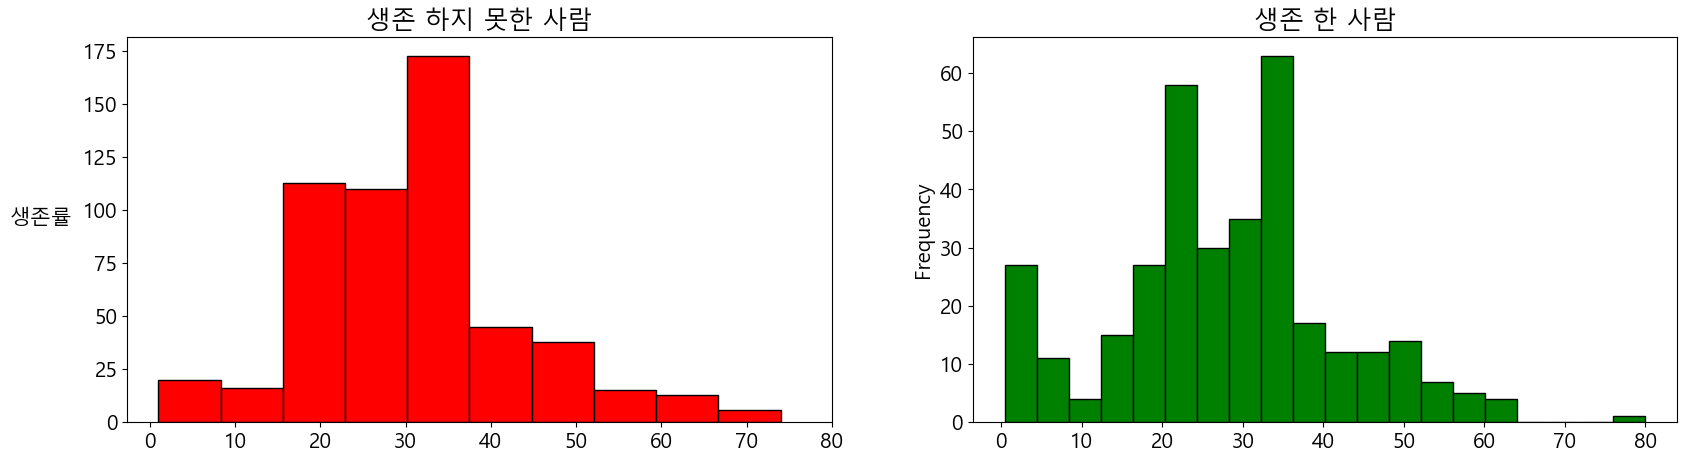

In [ ]:
# 연령대별 생존률

fig, ax = plt.subplots(1,2 , figsize=(20,5))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='red')
ax[0].set_title('생존 하지 못한 사람')
ax[0].set_ylabel('생존률', rotation=0,labelpad=30)
x1=list(range(0,85,10))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('생존 한 사람')
x2=list(range(0,85,10))
ax[1].set_xticks(x2)
plt.show()

In [ ]:
# 성별에 따른 생존률
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

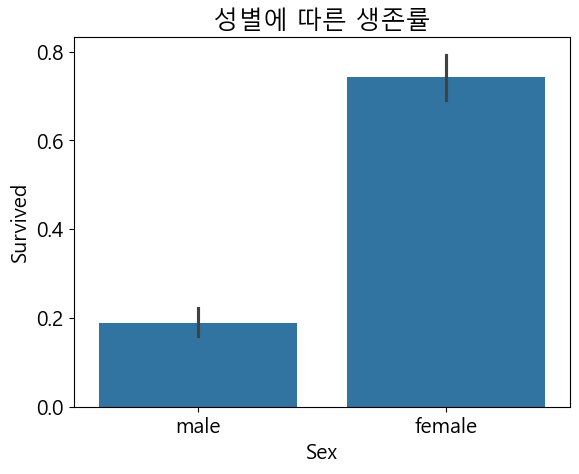

In [20]:
# 성별에 다른 생존률
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('성별에 따른 생존률')
plt.show()

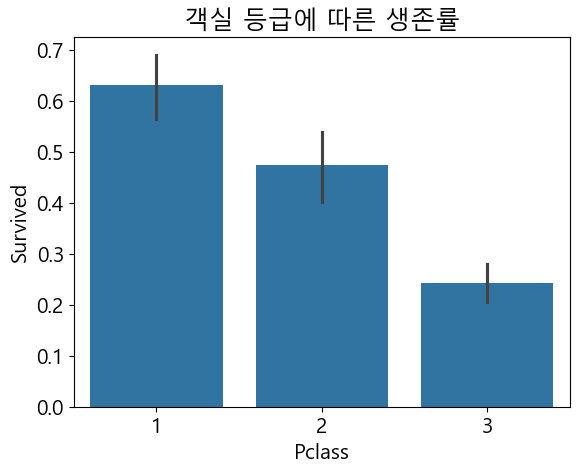

In [11]:
# 객실 등급에 따른 생존률률
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('객실 등급에 따른 생존률')
plt.show()

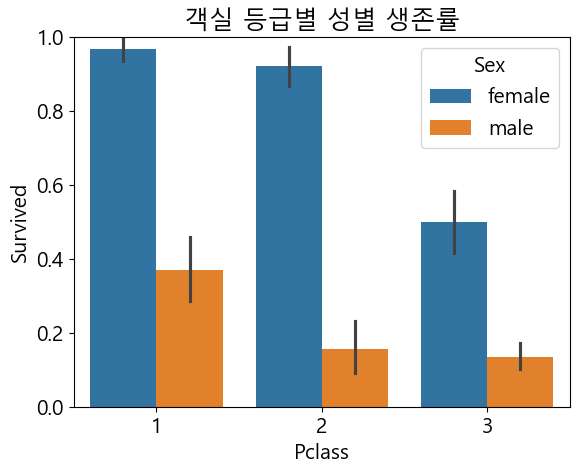

In [26]:
#객실 등급별로 성별에 따른 생존률
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('객실 등급별 성별 생존률')
plt.ylim(0,1)
plt.show()


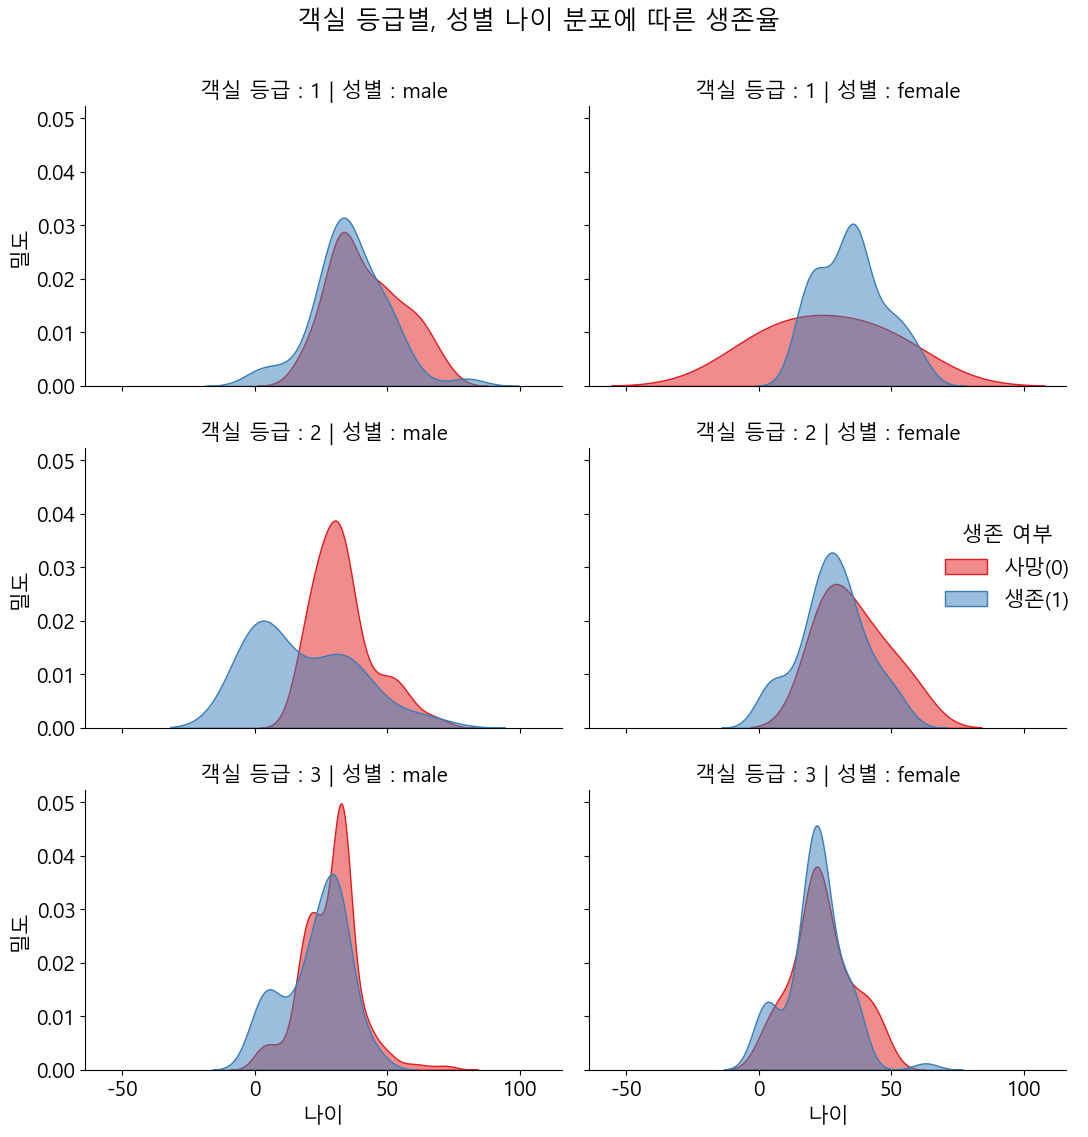

In [31]:
g = sns.FacetGrid(df, row='Pclass', col='Sex', hue='Survived', height = 4, aspect=1.2, palette='Set1', legend_out=True)

g.map(sns.kdeplot, 'Age', fill=True, alpha = 0.5)

g.set_axis_labels('나이','밀도')
g.set_titles(row_template='객실 등급 : {row_name}' , col_template="성별 : {col_name}")

g.add_legend(title="생존 여부", labels=['사망(0)','생존(1)'])

plt.suptitle('객실 등급별, 성별 나이 분포에 따른 생존율')
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # 전체 레이아웃 조정
plt.show()
